A big part of the data science is classifying ovservations in a dataset into separate categories, or classes. A popular use case of data classification is in separating a dataset into good and bad categories. For example below we can classify data into malignant and benign

In [1]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print('{}\n'.format(repr(bc.data)))
print('Data shape: {}\n'.format(bc.data.shape))

# Class labels
print('{}\n'.format(repr(bc.target)))
print('Labels shape: {}\n'.format(bc.target.shape))

# Label names
print('{}\n'.format(list(bc.target_names)))

malignant = bc.data[bc.target == 0]
print('Malignant shape: {}\n'.format(malignant.shape))

benign = bc.data[bc.target == 1]
print('Benign shape: {}\n'.format(benign.shape))

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Data shape: (569, 30)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 

In [14]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [2]:
"""component_data input represents the principal component data.
labels input is a 1-D array containing the class label IDs corresponding to each row of component_data.We can use
it to separate the principle components by class.

The class_label input represents a particular class label ID

The label_names input represents all the string names for the class labels.

"""

def get_label_info(component_data, labels, class_label, label_names):
    label_name = label_names[class_label]
    label_data = component_data[labels == class_label]
    return (label_name, label_data)
    pass
    
    

In [20]:
"""This function is used for visualizing the components"""

def separate_data(component_data, labels, label_names): 
    separated_data = []
    for class_label in range(len(label_names)):
        print('{}\n'.format(repr(class_label)))
        separated_data.append(get_label_info(component_data, labels, class_label, label_names))
    return separated_data
    pass

0

1



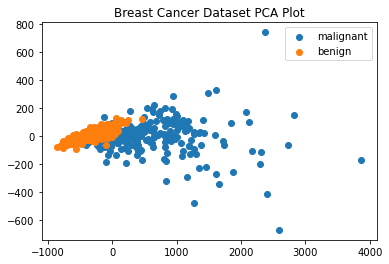

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
bc = load_breast_cancer()
pca_obj = PCA(n_components=2)
component_data = pca_obj.fit_transform(bc.data)
#print(component_data)
labels = bc.target
label_names = bc.target_names
# Using the completed separate_data function
separated_data = separate_data(component_data,
                               labels, label_names)

#print('{}\n'.format(repr(separated_data)))
# Plotting the data
import matplotlib.pyplot as plt
for label_name, label_data in separated_data:
    col1 = label_data[:, 0]  # 1st column (1st pr. comp.)
    col2 = label_data[:, 1]  # 2nd column (2nd pr. comp.)
    plt.scatter(col1, col2, label=label_name) # scatterplot
plt.legend()  # adds legend to plot
plt.title('Breast Cancer Dataset PCA Plot')
plt.show()